In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20241208.csv")
geospatial_data = gpd.read_file("geodata_nypd/nypp.shp")

In [3]:
# Visualization 1: Percentage by Borough
df_borough_counts = df['ARREST_BORO'].value_counts()

In [4]:
df_borough_counts.head()

ARREST_BORO
K    53994
M    46235
B    43899
Q    42978
S     8341
Name: count, dtype: int64

In [5]:
df_borough_counts.rename(index={'B': 'The Bronx', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'S': 'Staten Island'}, inplace = True)

In [6]:
df_borough_counts.index

Index(['Brooklyn', 'Manhattan', 'The Bronx', 'Queens', 'Staten Island'], dtype='object', name='ARREST_BORO')

([<matplotlib.patches.Wedge at 0x7418c2d25820>,
 [Text(0.7110788138893304, 0.8392657031225232, 'Brooklyn'),
  Text(-0.8672148097642295, 0.6767115144029924, 'Manhattan'),
  Text(-0.777213947037173, -0.7784205036681001, 'The Bronx'),
  Text(0.6318016490942558, -0.9004591474363393, 'Queens'),
  Text(1.0901283511166877, -0.14703801580411613, 'Staten Island')],
 [Text(0.387861171212362, 0.45778129261228534, '27.6%'),
  Text(-0.4730262598713978, 0.36911537149254126, '23.7%'),
  Text(-0.4239348802020943, -0.4245930020007818, '22.5%'),
  Text(0.3446190813241395, -0.4911595349652759, '22.0%'),
  Text(0.594615464245466, -0.08020255407497243, '4.3%')])

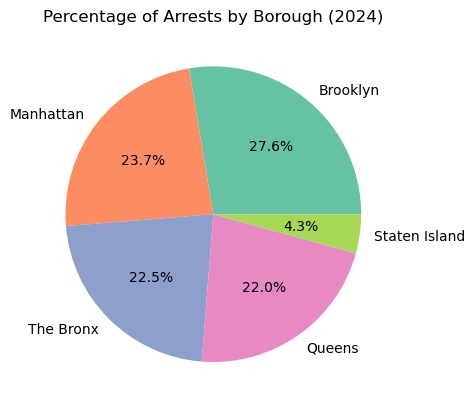

In [7]:
plt.title('Percentage of Arrests by Borough (2024)')
plt.pie(df_borough_counts, labels = df_borough_counts.index, autopct='%1.1f%%', colors = sns.color_palette('Set2'))

In [8]:
# Visualization 2 and 3: Age Group Bar Chart
df_agegroup_counts = df['AGE_GROUP'].value_counts()

In [9]:
df_agegroup_counts

AGE_GROUP
25-44    113619
45-64     37976
18-24     33139
<18        7246
65+        3467
Name: count, dtype: int64

<BarContainer object of 5 artists>

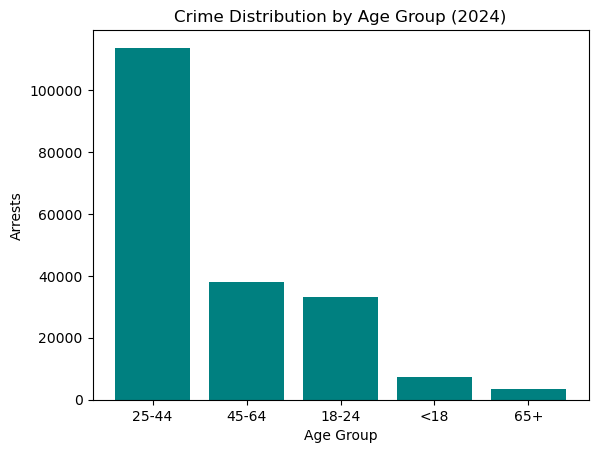

In [10]:
plt.title('Crime Distribution by Age Group (2024)')
plt.xlabel('Age Group')
plt.ylabel('Arrests')
plt.bar(x = df_agegroup_counts.index, height = df_agegroup_counts, color = 'teal')

In [11]:
df_agegroup_boro = df.groupby(['ARREST_BORO', 'AGE_GROUP']).size().reset_index(name = 'arrest_count')

In [12]:
def boro_name_change(abbrev, df, column_name):
    '''Given a borough's abbreviation, a dataframe, and a specific column that has that borough, 
    finds the borough's full name and replaces it in the dataframe'''
    if abbrev == 'B':
        df[column_name].replace(abbrev, 'The Bronx', inplace = True)
        return df
    if abbrev == 'K':
        df[column_name].replace(abbrev, 'Brooklyn', inplace = True)
        return df
    if abbrev == 'M':
        df[column_name].replace(abbrev, 'Manhattan', inplace = True)
        return df
    if abbrev == 'Q':
        df[column_name].replace(abbrev, 'Queens', inplace = True)
        return df
    if abbrev == 'S':
        df[column_name].replace(abbrev, 'Staten Island', inplace = True)
        return df

In [13]:
borough_abbrevs = set(df_agegroup_boro['ARREST_BORO'])
for i in borough_abbrevs:
    boro_name_change(i, df_agegroup_boro, 'ARREST_BORO')

/tmp/ipykernel_302/2581495985.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(abbrev, 'The Bronx', inplace = True)
/tmp/ipykernel_302/2581495985.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [14]:
df_agegroup_boro.head()

,ARREST_BORO,AGE_GROUP,arrest_count
0,The Bronx,18-24,8242
1,The Bronx,25-44,25605
2,The Bronx,45-64,7754
3,The Bronx,65+,649
4,The Bronx,<18,1649


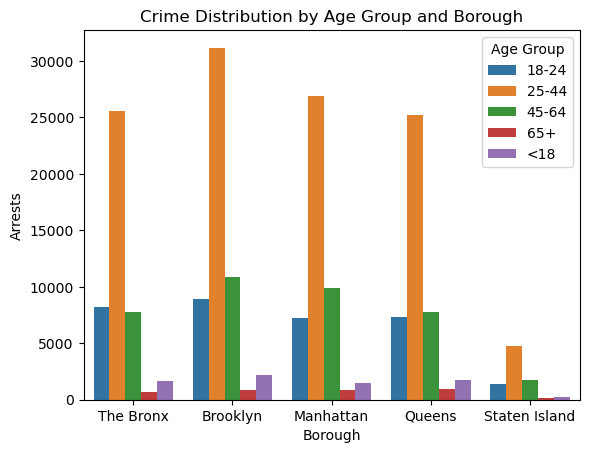

In [15]:
sns.barplot(x = 'ARREST_BORO', y = 'arrest_count', hue = 'AGE_GROUP', data = df_agegroup_boro)
plt.title('Crime Distribution by Age Group and Borough')
plt.xlabel('Borough')
plt.ylabel('Arrests')
plt.legend(title = 'Age Group')

In [16]:
df_boro_level_count = df.groupby(['ARREST_BORO', 'LAW_CAT_CD']).size().reset_index(name = 'boro_level_count')

In [17]:
df_boro_level_count

,ARREST_BORO,LAW_CAT_CD,boro_level_count
0,B,9,20
1,B,F,18258
2,B,I,30
3,B,M,25129
4,B,V,229
5,K,(null),1
6,K,9,12
7,K,F,23956
8,K,I,55
9,K,M,29134


In [18]:
# Removing (null), 9, and I in LAW_CAT_CD
levelofoffense_unwanted = ['(null)', '9', 'I']
for i in levelofoffense_unwanted:
    df_boro_level_count = df_boro_level_count[df_boro_level_count['LAW_CAT_CD'] != i]
for i in borough_abbrevs:
    boro_name_change(i, df_boro_level_count, 'ARREST_BORO')

/tmp/ipykernel_302/2581495985.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(abbrev, 'The Bronx', inplace = True)
/tmp/ipykernel_302/2581495985.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [19]:
df_boro_level_count

,ARREST_BORO,LAW_CAT_CD,boro_level_count
1,The Bronx,F,18258
3,The Bronx,M,25129
4,The Bronx,V,229
7,Brooklyn,F,23956
9,Brooklyn,M,29134
10,Brooklyn,V,659
13,Manhattan,F,18715
15,Manhattan,M,26180
16,Manhattan,V,706
19,Queens,F,18304


In [20]:
boros = list(set(df_boro_level_count['ARREST_BORO']))

In [21]:
def collect_offense_stats(df, law_code, column_law_code, column_count_code):
    '''Given a dataframe, a law_code, a column_law_code to search through, and a column with the count,
    searches for all occurences of that law_code from all the boroughs and outputs it as a list'''
   
    law_code_filtered_df = df_boro_level_count[df_boro_level_count[column_law_code] == law_code]
    count_lst = law_code_filtered_df[column_count_code].tolist()
    return count_lst

In [22]:
# Creating a new dataframe for our heatmap
offense_data = {'Felony': collect_offense_stats(df_boro_level_count, 'F', 'LAW_CAT_CD', 'boro_level_count'), 
                'Misdemeanor': collect_offense_stats(df_boro_level_count, 'M', 'LAW_CAT_CD', 'boro_level_count'), 
                'Violation': collect_offense_stats(df_boro_level_count, 'V', 'LAW_CAT_CD', 'boro_level_count')}
clean_offense_df = pd.DataFrame(offense_data, index = boros)
clean_offense_df

,Felony,Misdemeanor,Violation
Brooklyn,18258,25129,229
Queens,23956,29134,659
Manhattan,18715,26180,706
Staten Island,18304,23892,161
The Bronx,3293,5007,7


Text(0.5, 1.0, 'Level of Offense by Borough')

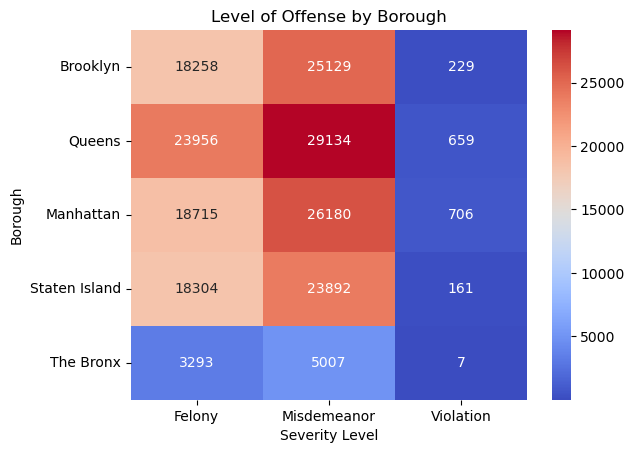

In [23]:
sns.heatmap(clean_offense_df, annot = True, fmt='g', cmap = 'coolwarm')
plt.xlabel('Severity Level')
plt.ylabel('Borough')
plt.title('Level of Offense by Borough')

In [24]:
arrests_by_precinct = df.groupby('ARREST_PRECINCT').size().reset_index(name='num_arrests')

In [25]:
arrests_by_precinct.head()

,ARREST_PRECINCT,num_arrests
0,1,2598
1,5,2711
2,6,1739
3,7,1729
4,9,1331


In [26]:
geospatial_data.head()

,Precinct,Shape_Leng,Shape_Area,geometry
0,1,80093.534429,4.728501e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,5,18807.124911,1.809453e+07,"POLYGON ((987399.207 202660.992, 987385.830 20..."
2,6,27255.991120,2.214302e+07,"POLYGON ((981714.030 209792.184, 981770.123 20..."
3,7,17287.544493,1.836667e+07,"POLYGON ((991608.135 201215.298, 991575.973 20..."
4,9,19772.510741,2.139539e+07,"POLYGON ((992119.124 204042.761, 992114.154 20..."


In [27]:
merged = geospatial_data.merge(arrests_by_precinct, left_on = 'Precinct', right_on = 'ARREST_PRECINCT')

In [28]:
merged.head()

,Precinct,Shape_Leng,Shape_Area,geometry,ARREST_PRECINCT,num_arrests
0,1,80093.534429,4.728501e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184....",1,2598
1,5,18807.124911,1.809453e+07,"POLYGON ((987399.207 202660.992, 987385.830 20...",5,2711
2,6,27255.991120,2.214302e+07,"POLYGON ((981714.030 209792.184, 981770.123 20...",6,1739
3,7,17287.544493,1.836667e+07,"POLYGON ((991608.135 201215.298, 991575.973 20...",7,1729
4,9,19772.510741,2.139539e+07,"POLYGON ((992119.124 204042.761, 992114.154 20...",9,1331


Text(0.5, 1.0, 'Arrests by Neighborhood in NYC (January-September 2024)')

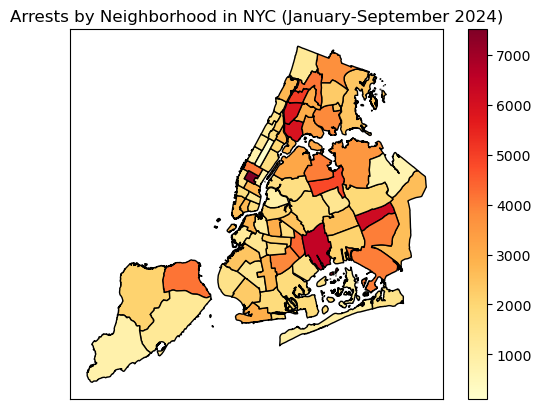

In [29]:
geo_plot = merged.plot(column = 'num_arrests', cmap = 'YlOrRd', legend = True, edgecolor = 'black')
plt.xticks([])
plt.yticks([])
geo_plot.set_title('Arrests by Neighborhood in NYC (January-September 2024)')